Importing plotly failed. Interactive plots will not work.



Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Records:
Customers: 0
Products: 0
Transactions: 0

Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max          

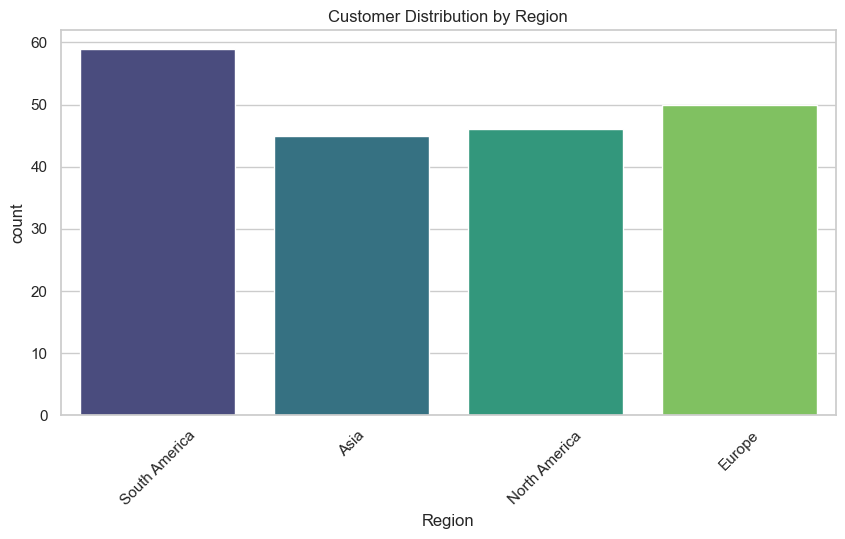

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10160\1418252733.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x="Category", palette="coolwarm")


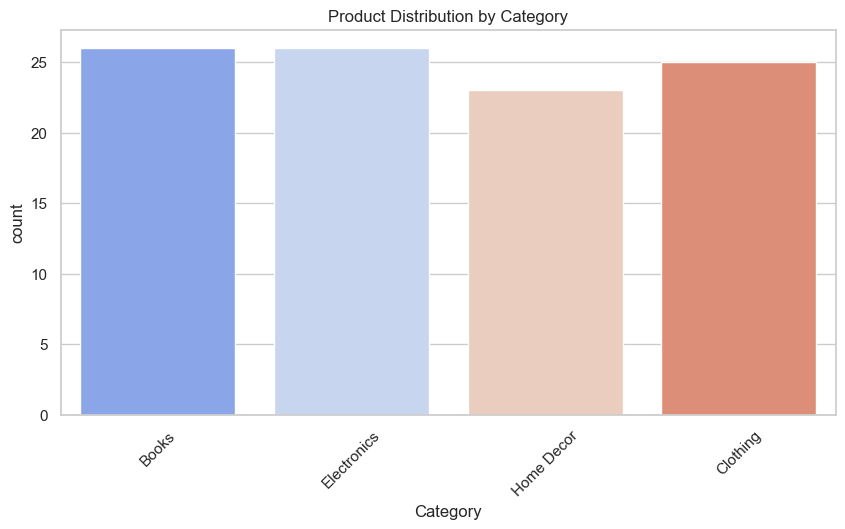

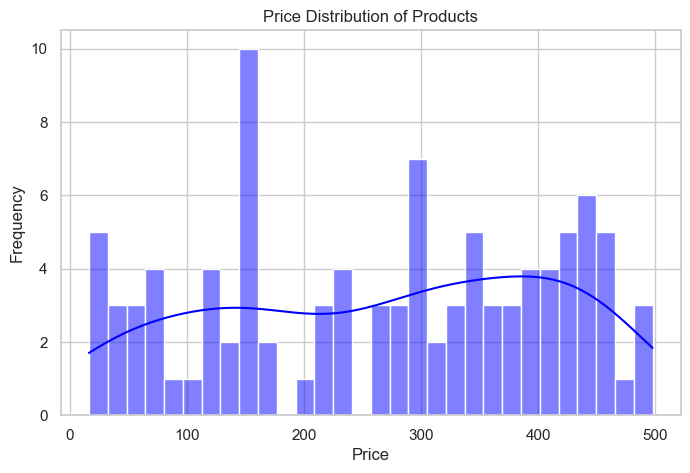

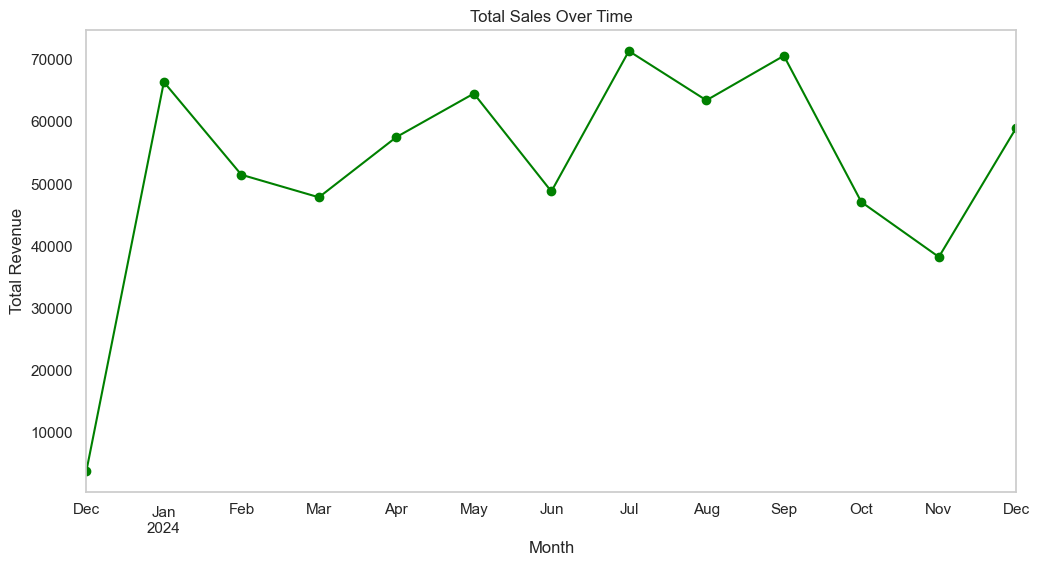

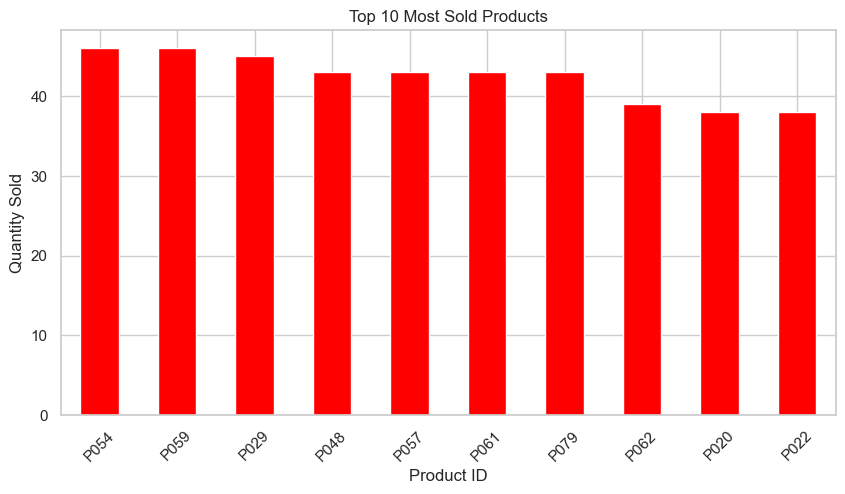

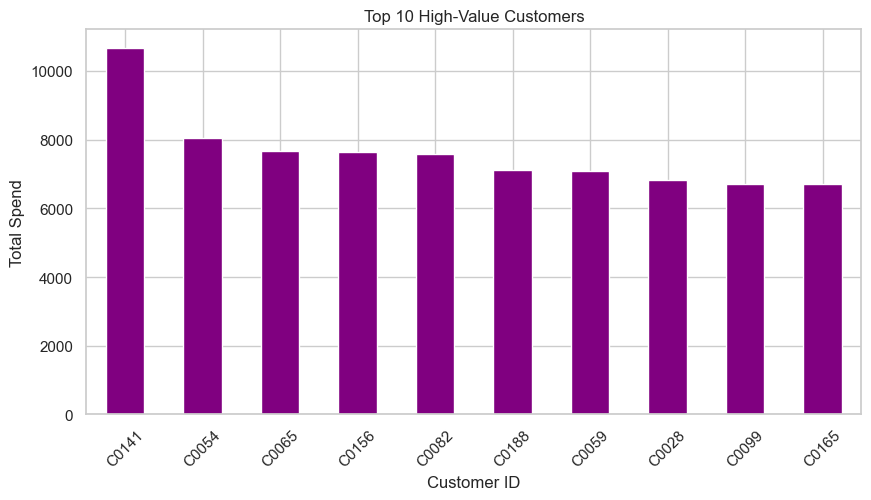

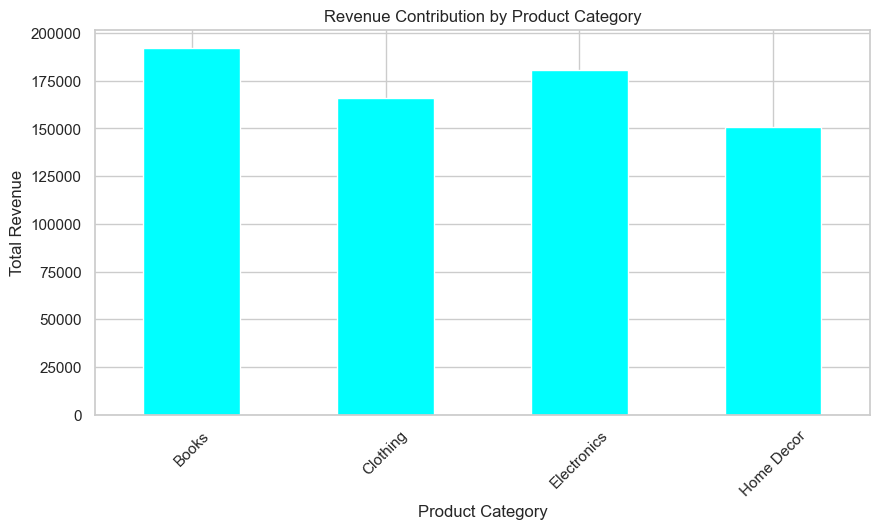

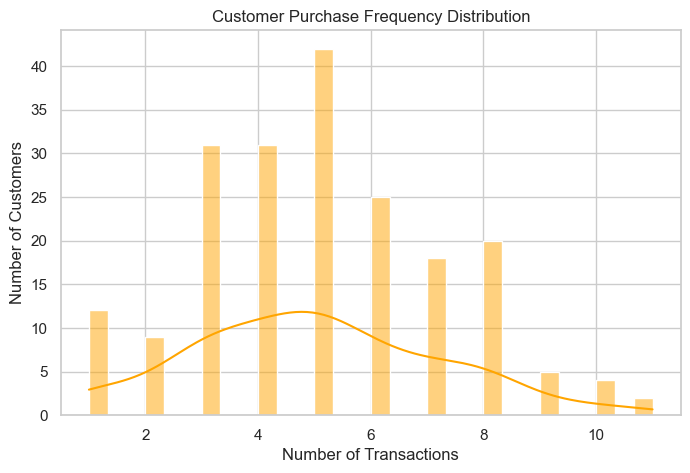

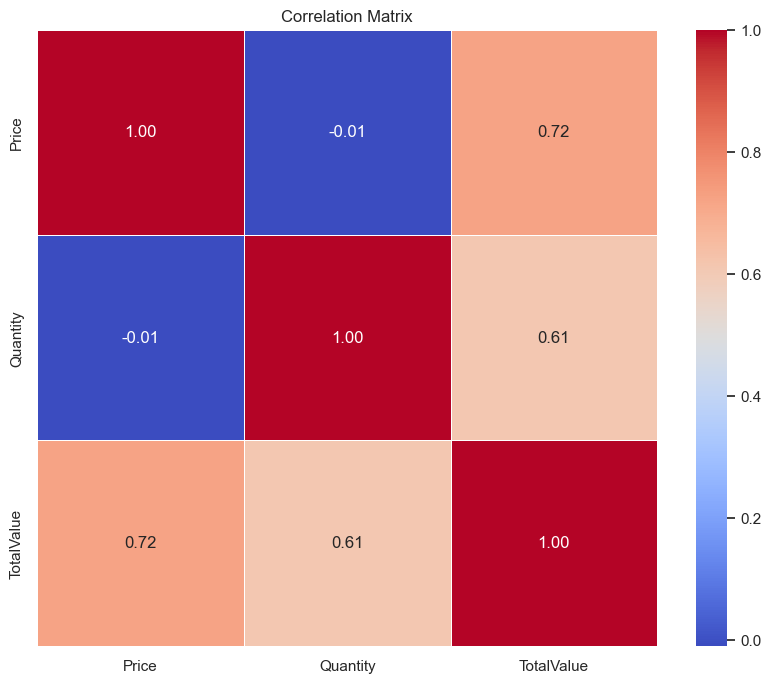

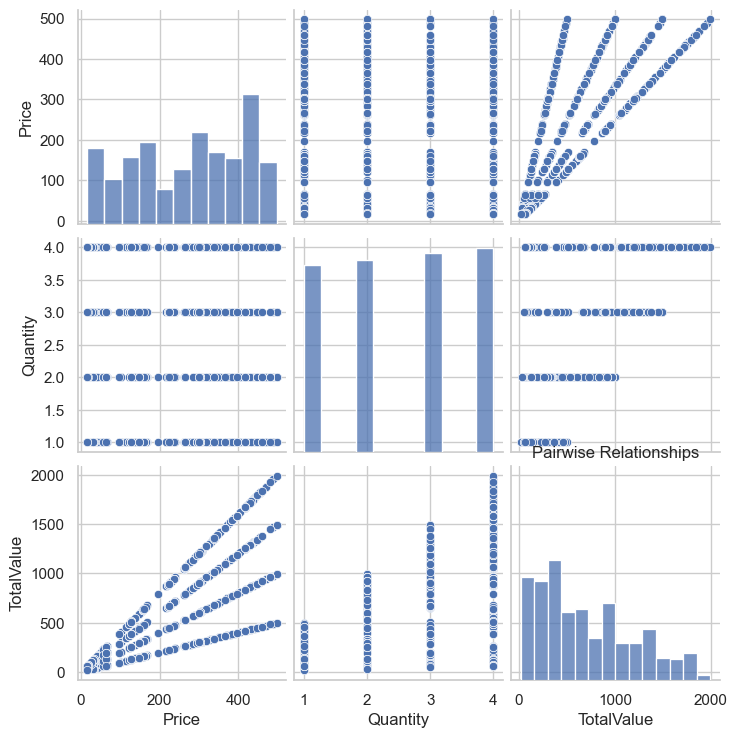

Outliers in Price: Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []
Outliers in Quantity: Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price, YearMonth]
Index: []
Outliers in TotalValue: Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price, YearMonth]
Index: []


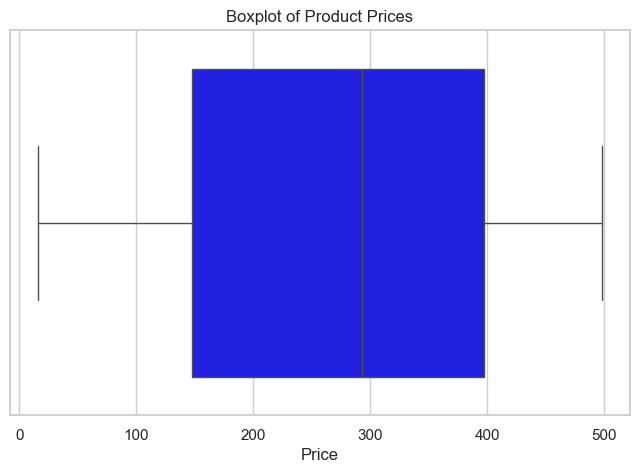

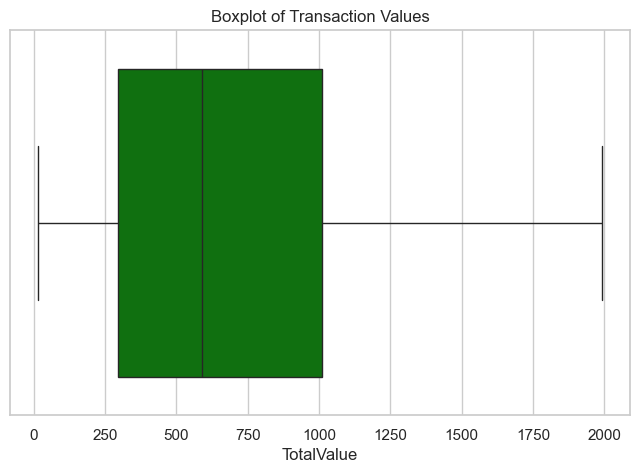

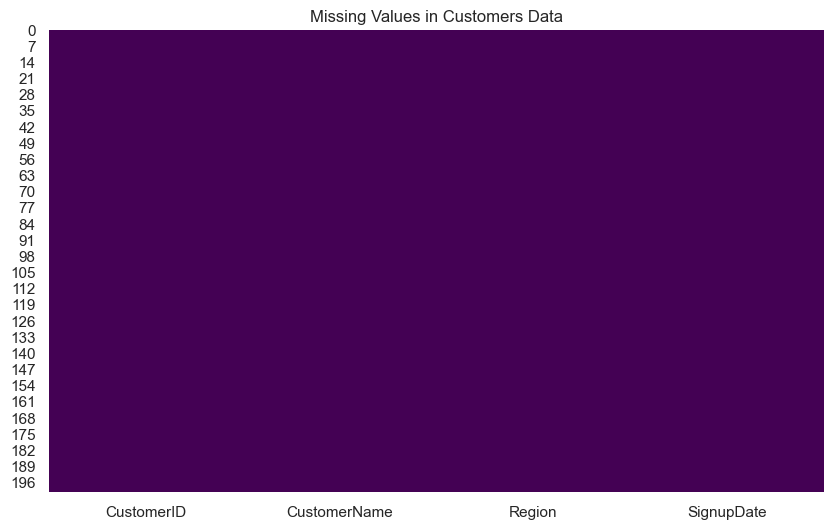

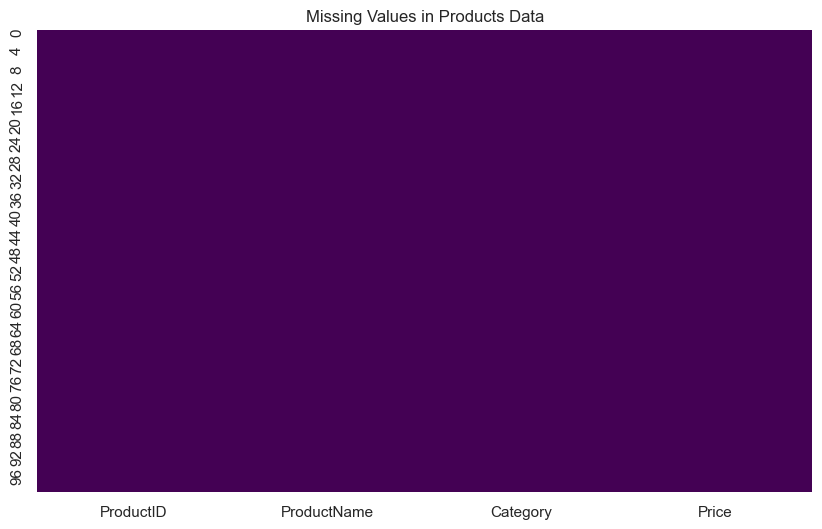

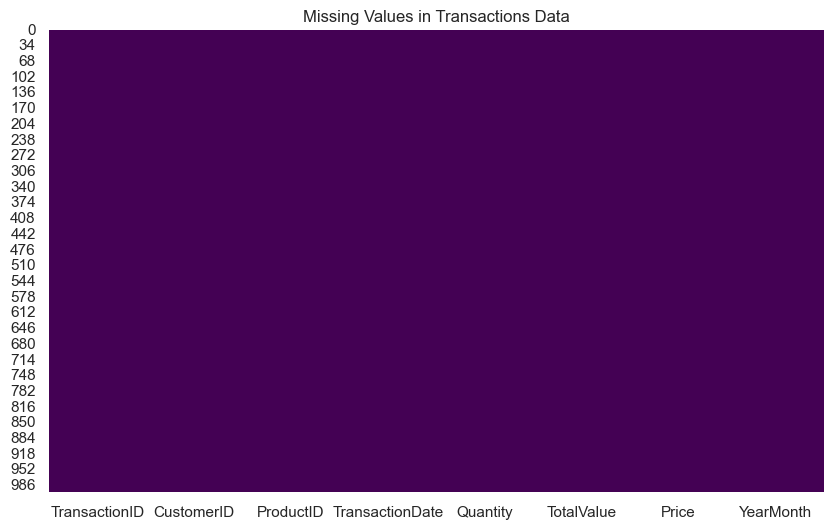

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10160\1418252733.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Segment", data=rfm, palette="coolwarm")


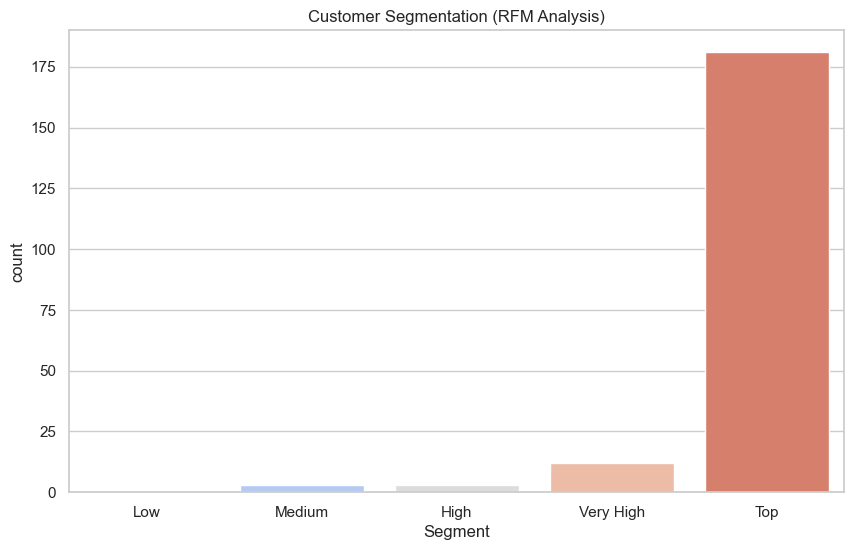

17:01:16 - cmdstanpy - INFO - Chain [1] start processing
17:01:17 - cmdstanpy - INFO - Chain [1] done processing


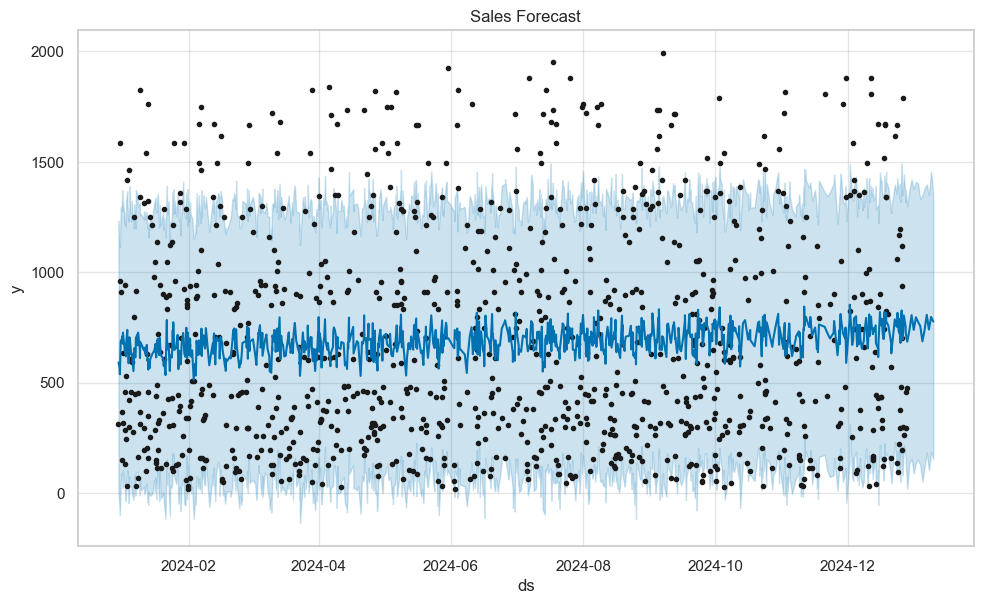

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from prophet import Prophet


sns.set(style="whitegrid")
folder_path = r"C:/Users/lenovo/Desktop/EDA_folder"

# Loading CSV files
customers = pd.read_csv(f"{folder_path}/Customers.csv")
products = pd.read_csv(f"{folder_path}/Products.csv")
transactions = pd.read_csv(f"{folder_path}/Transactions.csv")

# Checking for missing values in each dataset
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("\nProducts:")
print(products.isnull().sum())
print("\nTransactions:")
print(transactions.isnull().sum())
customers.fillna("Unknown", inplace=True)
products.fillna("Unknown", inplace=True)
transactions.dropna(inplace=True)  
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Checking for duplicate entries
print("\nDuplicate Records:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

#statistics of numerical columns
print("\nSummary Statistics:")
print(transactions.describe())

# Total number of unique customers, products, and transactions
print("\nTotal Unique Customers:", customers["CustomerID"].nunique())
print("Total Unique Products:", products["ProductID"].nunique())
print("Total Transactions:", transactions["TransactionID"].nunique())

# Customer distribution by region
plt.figure(figsize=(10, 5))
sns.countplot(data=customers, x="Region", hue="Region", palette="viridis", legend=False)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Product distribution by category
plt.figure(figsize=(10, 5))
sns.countplot(data=products, x="Category", palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Price distribution of products
plt.figure(figsize=(8, 5))
sns.histplot(products["Price"], bins=30, kde=True, color="blue")
plt.title("Price Distribution of Products")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Transaction trends with respect to time
transactions["YearMonth"] = transactions["TransactionDate"].dt.to_period("M")
monthly_sales = transactions.groupby("YearMonth")["TotalValue"].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker="o", color="green")
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

# Most sold products
top_products = transactions.groupby("ProductID")["Quantity"].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="red")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Most valuable customers (with highest spending)
top_customers = transactions.groupby("CustomerID")["TotalValue"].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_customers.plot(kind="bar", color="purple")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

# Revenue contribution by product category
merged_data = transactions.merge(products, on="ProductID")
category_sales = merged_data.groupby("Category")["TotalValue"].sum()

plt.figure(figsize=(10, 5))
category_sales.plot(kind="bar", color="cyan")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Customer purchase frequency
tx_counts = transactions.groupby("CustomerID")["TransactionID"].count()
plt.figure(figsize=(8, 5))
sns.histplot(tx_counts, bins=30, kde=True, color="orange")
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()

##correlations, relationships between columns, and outliers.
# Correlation matrix and heatmap
numerical_cols = ["Price", "Quantity", "TotalValue"]
corr = transactions[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(transactions[numerical_cols])
plt.title("Pairwise Relationships")
plt.show()

# Outlier Detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for critical numerical columns
outliers_price = detect_outliers(products, "Price")
outliers_quantity = detect_outliers(transactions, "Quantity")
outliers_value = detect_outliers(transactions, "TotalValue")

print("Outliers in Price:", outliers_price)
print("Outliers in Quantity:", outliers_quantity)
print("Outliers in TotalValue:", outliers_value)

# Boxplot for Price Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=products["Price"], color="blue")
plt.title("Boxplot of Product Prices")
plt.show()

# Boxplot for Transaction Value Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=transactions["TotalValue"], color="green")
plt.title("Boxplot of Transaction Values")
plt.show()

# Visualizing missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Customers Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(products.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Products Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(transactions.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Transactions Data")
plt.show()

# RFM Analysis for Customer Segmentation
current_date = pd.to_datetime('today')

recency = transactions.groupby("CustomerID")["TransactionDate"].max().reset_index()
recency["Recency"] = (current_date - recency["TransactionDate"]).dt.days
frequency = transactions.groupby("CustomerID")["TransactionID"].count().reset_index()
frequency.rename(columns={"TransactionID": "Frequency"}, inplace=True)
monetary = transactions.groupby("CustomerID")["TotalValue"].sum().reset_index()
monetary.rename(columns={"TotalValue": "Monetary"}, inplace=True)
rfm = recency.merge(frequency, on="CustomerID").merge(monetary, on="CustomerID")
rfm["Segment"] = pd.cut(rfm["Monetary"], bins=[0, 50, 200, 500, 1000, np.inf], labels=["Low", "Medium", "High", "Very High", "Top"])

# Plotting RFM Segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x="Segment", data=rfm, palette="coolwarm")
plt.title("Customer Segmentation (RFM Analysis)")
plt.show()

# Sales forecast using prophet
sales_data = transactions.groupby("TransactionDate")["TotalValue"].sum().reset_index()
sales_data.columns = ["ds", "y"]
sales_data["ds"] = pd.to_datetime(sales_data["ds"])
model = Prophet()
model.fit(sales_data)
future = model.make_future_dataframe(periods=12)
forecast = model.predict(future)
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

## Feature engineering to create new features
 # Customer Age from SignupDate
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"]) 
current_date = pd.to_datetime('today')
customers["CustomerAge"] = (current_date - customers["SignupDate"]).dt.days // 365

# Product Popularity Score: Quantity sold * Price
product_sales = transactions.groupby("ProductID")["Quantity"].sum().reset_index()
products = products.merge(product_sales, on="ProductID", how="left")
products["ProductPopularityScore"] = products["Quantity"] * products["Price"]

# Weekday column for transactions
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])  
transactions["Weekday"] = transactions["TransactionDate"].dt.day_name()

